In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import cv2
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image, ImageDraw, ImageEnhance
from skimage import io
import math 
from skimage import img_as_float

uploaded = files.upload()

import matplotlib.pyplot as plt

Saving plates.png to plates (1).png


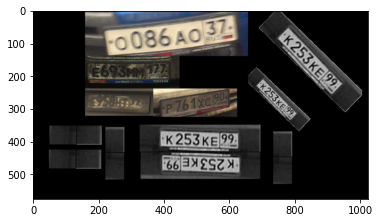

In [2]:
image = io.imread(BytesIO(uploaded['plates.png']))

width, height, _ = image.shape

count = 0

plt.imshow(image)
plt.show()
plt.close()

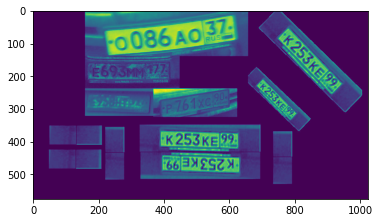

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
plt.close()

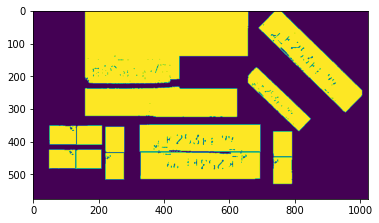

In [4]:
ret,thresh1 = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)

plt.imshow(thresh1)
plt.show()
plt.close()

In [5]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

big_contours = []
big_cnt_area = []
cnt_area = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if(area > 5000):
      big_contours.append(cnt)
      big_cnt_area.append(area)
    cnt_area.append(area)

print(len(big_contours))
print(big_cnt_area)

indices = np.array(big_cnt_area).argsort()
sorted_area = sorted(cnt_area)

297
6
[29182.0, 29888.0, 39583.5, 11922.5, 30981.0, 91515.5]


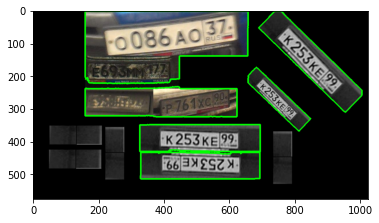

In [6]:
image_result = image.copy()
for i in indices:
  cv2.drawContours(image_result, big_contours, i, (0, 255, 0), 3)

plt.imshow(image_result)
plt.show()
plt.close()

432 513 328 693
347 430 326 694
231 323 159 623
172 366 657 848
0 309 690 1005
0 222 159 657


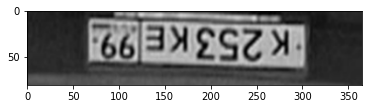

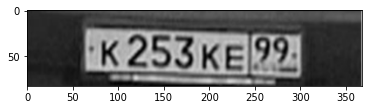

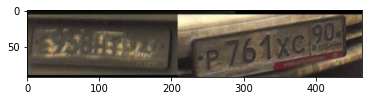

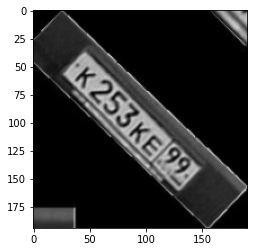

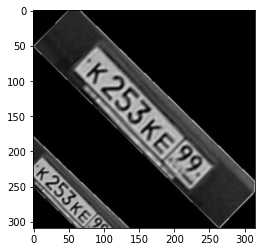

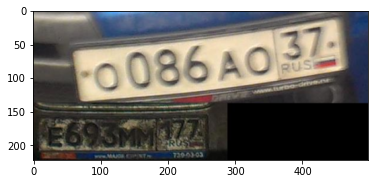

In [7]:
images = []
minx = 2000
miny = 2000
maxx = -1000
maxy = -1000
minxy = []
for i in big_contours:
  minx = 2000; miny = 2000; maxx = -1000; maxy = -1000
  for j in i:
    if j[0][1] < minx:
      minx = j[0][1]
    if j[0][0] < miny:
      miny = j[0][0]
    if j[0][1] > maxx:
      maxx = j[0][1]
    if j[0][0] > maxy:
      maxy = j[0][0]
  print(minx, maxx, miny, maxy)
  minxy.append([minx, miny])
  images.append(image[minx:maxx, miny:maxy])

for i in images:
  plt.imshow(i)
  plt.show()
  plt.close()

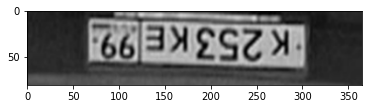

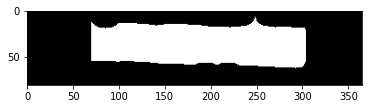

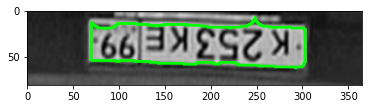

In [8]:
plt.imshow(images[0])
plt.show()
plt.close()

ret,thresh0 = cv2.threshold(images[0],150,255,cv2.THRESH_BINARY)

#thresh0 = cv2.erode(thresh0, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)))
thresh0 = cv2.morphologyEx(thresh0, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 6)))
thresh0 = cv2.morphologyEx(thresh0, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 20)))

plt.imshow(thresh0)
plt.show()
plt.close()

contours, hierarchy = cv2.findContours(cv2.cvtColor(thresh0, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

first_number = cv2.drawContours(images[0].copy(), contours, 0, (0, 255, 0), 2)

plt.imshow(first_number)
plt.show()
plt.close()

image_draw = image.copy()
im = Image.fromarray(np.uint8(image_draw))
im0 = Image.fromarray(np.uint8(first_number))
im.paste(im0, (minxy[0][1], minxy[0][0]))

count = count + 1

#im

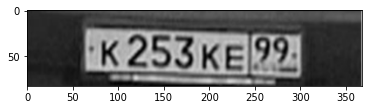

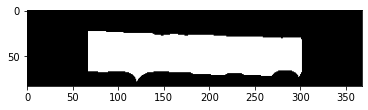

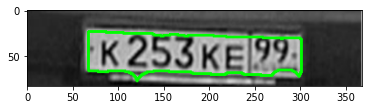

In [9]:
plt.imshow(images[1])
plt.show()
plt.close()

ret,thresh1 = cv2.threshold(images[1],150,255,cv2.THRESH_BINARY)

#thresh0 = cv2.erode(thresh0, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)))
thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 6)))
thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 20)))

plt.imshow(thresh1)
plt.show()
plt.close()

contours, hierarchy = cv2.findContours(cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

first_number = cv2.drawContours(images[1].copy(), contours, 0, (0, 255, 0), 2)

plt.imshow(first_number)
plt.show()
plt.close()

im0 = Image.fromarray(np.uint8(first_number))
im.paste(im0, (minxy[1][1], minxy[1][0]))

count = count + 1
#im

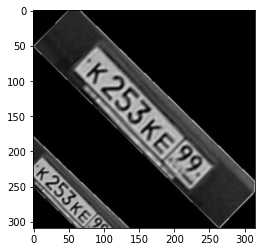

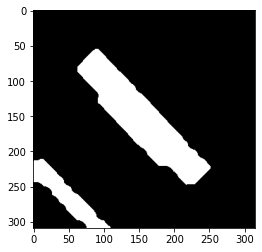

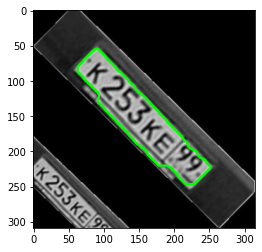

In [10]:
plt.imshow(images[4])
plt.show()
plt.close()

ret,thresh1 = cv2.threshold(images[4],150,255,cv2.THRESH_BINARY)

#thresh0 = cv2.erode(thresh0, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)))
thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 5)))
thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 20)))

plt.imshow(thresh1)
plt.show()
plt.close()

contours, hierarchy = cv2.findContours(cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

first_number = cv2.drawContours(images[4].copy(), contours, 1, (0, 255, 0), 2)

plt.imshow(first_number)
plt.show()
plt.close()

im0 = Image.fromarray(np.uint8(first_number))
im.paste(im0, (minxy[4][1], minxy[4][0]))

count = count + 1
#im

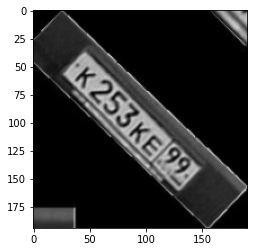

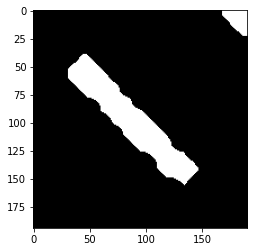

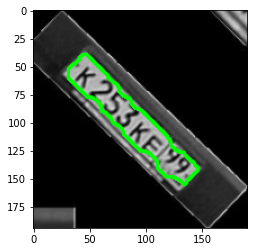

In [11]:
plt.imshow(images[3])
plt.show()
plt.close()

ret,thresh1 = cv2.threshold(images[3],150,255,cv2.THRESH_BINARY)

#thresh0 = cv2.erode(thresh0, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)))
thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 5)))
thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 20)))

plt.imshow(thresh1)
plt.show()
plt.close()

contours, hierarchy = cv2.findContours(cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

first_number = cv2.drawContours(images[3].copy(), contours, 0, (0, 255, 0), 2)

plt.imshow(first_number)
plt.show()
plt.close()

im0 = Image.fromarray(np.uint8(first_number))
im.paste(im0, (minxy[3][1], minxy[3][0]))

count = count + 1
#im

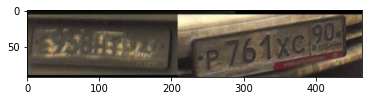

(92, 464, 3)
3145.5


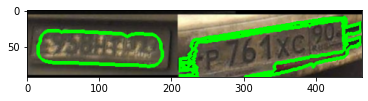

In [12]:
plt.imshow(images[2])
plt.show()
plt.close()

print(images[2].shape)
image_right = images[2][0:92,210:463].copy()
image_left = images[2][0:92,0:210].copy()

image2_gray = cv2.cvtColor(image_right.copy(), cv2.COLOR_BGR2GRAY)

binarized = cv2.adaptiveThreshold(image2_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13, 3)
binarized = cv2.morphologyEx(binarized, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)))

contours, hierarchy = cv2.findContours(binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in range(len(contours)):
  if cv2.contourArea(contours[cnt]) > 2500:
    print(cv2.contourArea(contours[cnt]))
    cv2.drawContours(image_right, contours, cnt,(0, 255, 0), 3)

count = count + 1

images2_res = images[2].copy()
images2_res[0:92,210:463] = image_right

image2_gray = cv2.cvtColor(image_left.copy(), cv2.COLOR_BGR2GRAY)

binarized = cv2.threshold(image2_gray, 53, 255, cv2.THRESH_BINARY)[1]
binarized = cv2.erode(binarized, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
binarized = cv2.morphologyEx(binarized, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (34, 34)))

contours, hierarchy = cv2.findContours(binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image_left, contours, 0,(0, 255, 0), 3)

count = count + 1

images2_res[0:92,0:210] = image_left

plt.imshow(images2_res)
plt.show()
plt.close()

im0 = Image.fromarray(np.uint8(images2_res))
im.paste(im0, (minxy[2][1], minxy[2][0]))

#im

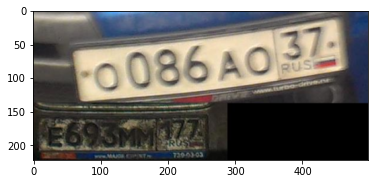

7300.0


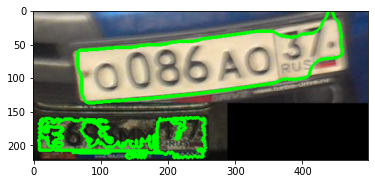

In [13]:
plt.imshow(images[5])
plt.show()
plt.close()

image2_gray = cv2.cvtColor(images[5].copy(), cv2.COLOR_BGR2GRAY)

binarized = cv2.threshold(image2_gray, 176, 255, cv2.THRESH_BINARY)[1]
binarized = cv2.morphologyEx(binarized, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
binarized = cv2.morphologyEx(binarized, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30)))
binarized = cv2.dilate(binarized, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50)))
binarized = cv2.erode(binarized, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (45, 45)))

contours, hierarchy = cv2.findContours(binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_res = images[5].copy()
cv2.drawContours(image_res, contours, 0,(0, 255, 0), 3)

count = count + 1

binarized = cv2.threshold(image2_gray, 58, 255, cv2.THRESH_TRUNC)[1]
binarized = cv2.threshold(binarized, 48, 255, cv2.THRESH_BINARY)[1]
binarized = cv2.dilate(binarized, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))

contours, hierarchy = cv2.findContours(binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in range(len(contours)):
  if cv2.contourArea(contours[cnt]) > 2500 and cv2.contourArea(contours[cnt]) < 10000:
    print(cv2.contourArea(contours[cnt]))
    cv2.drawContours(image_res, contours, cnt,(0, 255, 0), 3)

count = count + 1

plt.imshow(image_res)
plt.show()
plt.close()

im0 = Image.fromarray(np.uint8(image_res))
im.paste(im0, (minxy[5][1], minxy[5][0]))

#im

Количество номеров машин на изображении:  8


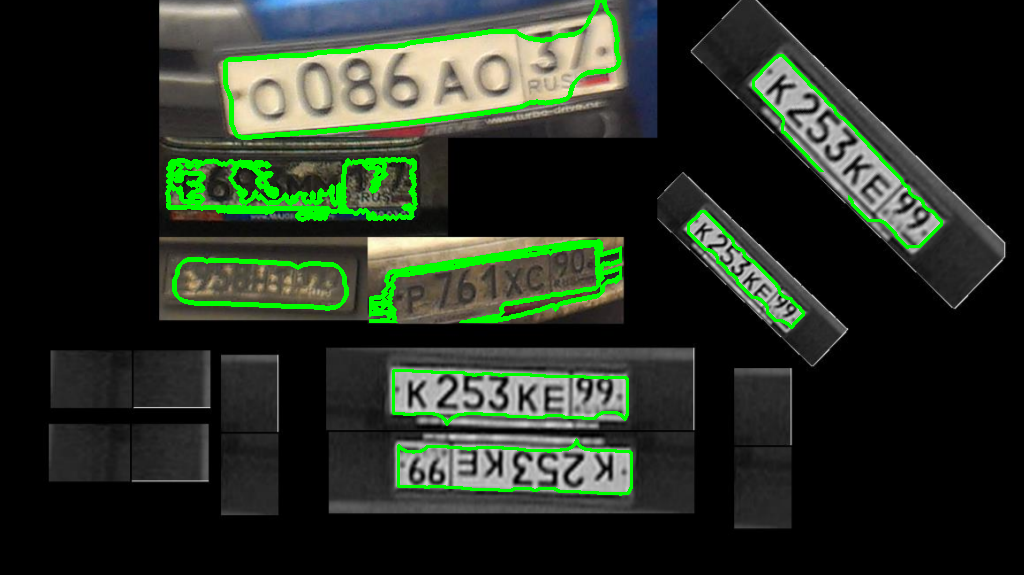

In [14]:
print("Количество номеров машин на изображении: ", count)

im

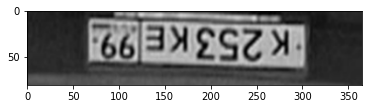

[([[67, 11], [297, 11], [297, 73], [67, 73]], 'к253к&?9', 0.17069523604201495)]

In [15]:
from imutils import contours
!pip install easyocr
import easyocr

text = []

img_img = images[0].copy()
plt.imshow(img_img)
plt.show()
plt.close()

img_img = np.rot90(np.rot90(img_img))

gray = cv2.cvtColor(img_img, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['ru'])
result = reader.readtext(gray)
result

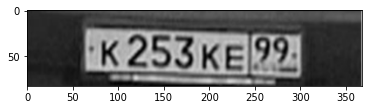

[([[71, 6], [313, 6], [313, 67], [71, 67]],
  'бынжд92я;',
  0.0013634306088538268)]

In [16]:
img_img = images[1].copy()
plt.imshow(img_img)
plt.show()
plt.close()

img_img = np.rot90(np.rot90(img_img))

gray = cv2.cvtColor(img_img, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['ru'])
result = reader.readtext(gray)
result

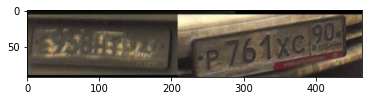

[([[389, 13], [435, 13], [435, 55], [389, 55]], '90.', 0.3834056003641444),
 ([[232.8200063599809, 41.91201017596947],
   [392.3962071248296, 17.3768437587634],
   [397.17999364001906, 68.08798982403053],
   [237.60379287517043, 92.6231562412366]],
  'Р761хс',
  0.2646884795897962)]

In [17]:
img_img = images[2].copy()
plt.imshow(img_img)
plt.show()
plt.close()

gray = cv2.cvtColor(img_img, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['ru'])
result = reader.readtext(gray)
result

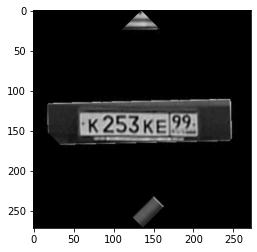

[([[59, 125], [211, 125], [211, 161], [59, 161]],
  ':к253к&?9',
  0.17028978033353717)]

In [19]:
img_img = images[3].copy()

from scipy.ndimage import rotate

img_img = rotate(img_img, angle=45)

plt.imshow(img_img)
plt.show()
plt.close()

gray = cv2.cvtColor(img_img, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['ru'])
result = reader.readtext(gray)
result

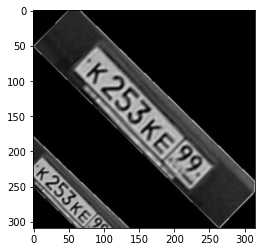

[([[64, 58], [92, 58], [92, 88], [64, 88]], '89', 0.031291947541409015),
 ([[59.25162575718086, 85.04011954178199],
   [98.42346542281324, 49.01282052358167],
   [221.74837424281915, 191.959880458218],
   [182.57653457718678, 227.98717947641833]],
  ';',
  0.036377900893885595),
 ([[172.1033793898917, 199.62743465776177],
   [212.79933470837148, 167.04578803716822],
   [262.8966206101083, 234.37256534223823],
   [222.20066529162852, 267.9542119628318]],
  '[8',
  0.6668402142923548),
 ([[-11.627070176802834, 223.04945788614214],
   [11.365437791195419, 200.01672807596992],
   [94.62707017680283, 293.95054211385786],
   [69.63456220880458, 316.9832719240301]],
  '8',
  0.03497043469207761)]

In [26]:
img_img = images[4].copy()
plt.imshow(img_img)
plt.show()
plt.close()

gray = cv2.cvtColor(img_img, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['ru'])
result = reader.readtext(gray)
result

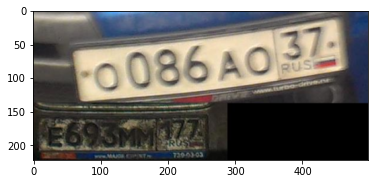

[([[363, 19], [463, 19], [463, 81], [363, 81]], '31:', 0.4535560354479378),
 ([[78, 31], [371, 31], [371, 133], [78, 133]], '008640', 0.5430110180414249),
 ([[16, 160], [178, 160], [178, 212], [16, 212]],
  '389~4*',
  0.00910882814574203),
 ([[360.07944680100655, 73.69533616120788],
   [418.5268142019845, 64.3828389107299],
   [421.92055319899345, 90.30466383879212],
   [363.4731857980155, 99.6171610892701]],
  '$',
  0.8893768547960121)]

In [27]:
img_img = images[5].copy()
plt.imshow(img_img)
plt.show()
plt.close()

gray = cv2.cvtColor(img_img, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['ru'])
result = reader.readtext(gray)
result